# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [18]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)





In [19]:

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
    
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country =city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | remire-montjoly
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | ibra'
City not found. Skipping...
Processing Record 4 of Set 1 | salekhard
Processing Record 5 of Set 1 | bikenibeu village
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | miles city
Processing Record 8 of Set 1 | belyy yar
Processing Record 9 of Set 1 | troitsko-pechorsk
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | mumbwa
Processing Record 12 of Set 1 | upington
Processing Record 13 of Set 1 | nueva concepcion
Processing Record 14 of Set 1 | nar'yan-mar
Processing Record 15 of Set 1 | fort bragg
Processing Record 16 of Set 1 | brookings
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | pacific grove
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | kusadasi
Processing Record 21 of Set 1 | magadan
Processing Re

In [21]:
city_url

'https://api.openweathermap.org/data/2.5/weather?q=port macquarie&appid=2d09c041b03bd6839269a553382bdfab'

In [22]:
city_weather

{'coord': {'lon': 152.9167, 'lat': -31.4333},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 295.31,
  'feels_like': 295.98,
  'temp_min': 295.31,
  'temp_max': 295.31,
  'pressure': 1014,
  'humidity': 92,
  'sea_level': 1014,
  'grnd_level': 1013},
 'visibility': 10000,
 'wind': {'speed': 2.59, 'deg': 17, 'gust': 3.65},
 'clouds': {'all': 41},
 'dt': 1709467327,
 'sys': {'type': 2,
  'id': 2037918,
  'country': 'AU',
  'sunrise': 1709408386,
  'sunset': 1709454069},
 'timezone': 39600,
 'id': 2152659,
 'name': 'Port Macquarie',
 'cod': 200}

In [23]:
city_data

[{'City': 'remire-montjoly',
  'Lat': 4.9167,
  'Lng': -52.2667,
  'Max Temp': 299.17,
  'Humidity': 89,
  'Cloudiness': 0,
  'Wind Speed': 0,
  'Country': 'GF',
  'Date': 1709466947},
 {'City': 'adamstown',
  'Lat': -25.066,
  'Lng': -130.1015,
  'Max Temp': 297.68,
  'Humidity': 77,
  'Cloudiness': 99,
  'Wind Speed': 7.49,
  'Country': 'PN',
  'Date': 1709466947},
 {'City': 'salekhard',
  'Lat': 66.53,
  'Lng': 66.6019,
  'Max Temp': 264.41,
  'Humidity': 94,
  'Cloudiness': 95,
  'Wind Speed': 3.99,
  'Country': 'RU',
  'Date': 1709466948},
 {'City': 'bikenibeu village',
  'Lat': 1.3673,
  'Lng': 173.1241,
  'Max Temp': 300.13,
  'Humidity': 89,
  'Cloudiness': 40,
  'Wind Speed': 5.14,
  'Country': 'KI',
  'Date': 1709466949},
 {'City': 'blackmans bay',
  'Lat': -43.0167,
  'Lng': 147.3167,
  'Max Temp': 282.22,
  'Humidity': 67,
  'Cloudiness': 61,
  'Wind Speed': 1.34,
  'Country': 'AU',
  'Date': 1709466949},
 {'City': 'miles city',
  'Lat': 46.4083,
  'Lng': -105.8406,
  'Max 

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,remire-montjoly,4.9167,-52.2667,299.17,89,0,0.00,GF,1709466947
1,adamstown,-25.0660,-130.1015,297.68,77,99,7.49,PN,1709466947
2,salekhard,66.5300,66.6019,264.41,94,95,3.99,RU,1709466948
3,bikenibeu village,1.3673,173.1241,300.13,89,40,5.14,KI,1709466949
4,blackmans bay,-43.0167,147.3167,282.22,67,61,1.34,AU,1709466949


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,remire-montjoly,4.9167,-52.2667,299.17,89,0,0.00,GF,1709466947
1,adamstown,-25.0660,-130.1015,297.68,77,99,7.49,PN,1709466947
2,salekhard,66.5300,66.6019,264.41,94,95,3.99,RU,1709466948
3,bikenibeu village,1.3673,173.1241,300.13,89,40,5.14,KI,1709466949
4,blackmans bay,-43.0167,147.3167,282.22,67,61,1.34,AU,1709466949


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

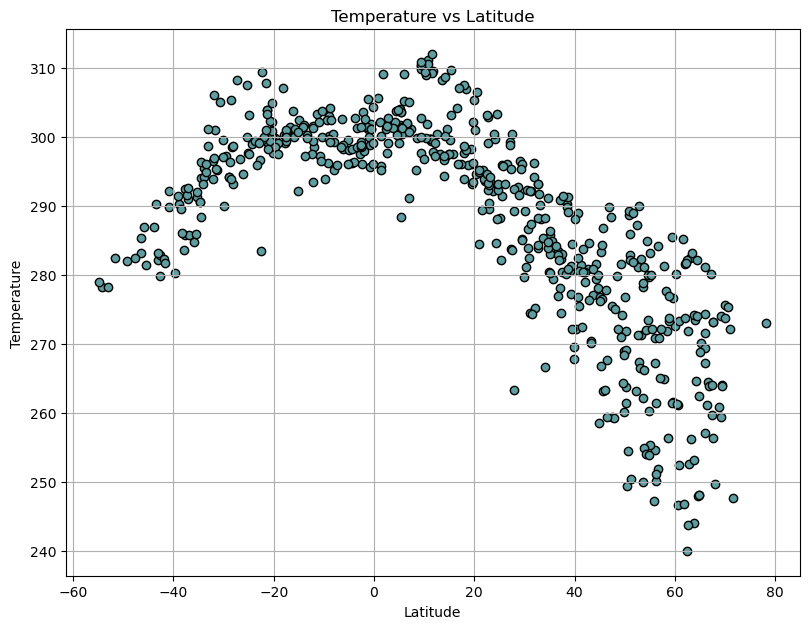

In [28]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o",facecolors="cadetblue",edgecolors="black")
plt.tight_layout()
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature vs Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

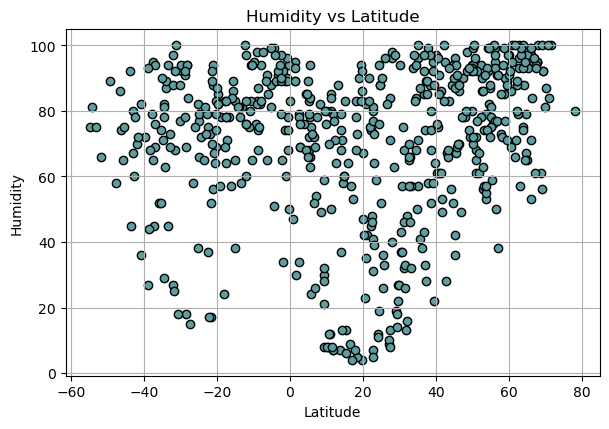

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(6,4))
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o",facecolors="cadetblue",edgecolors="black")
plt.tight_layout()
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

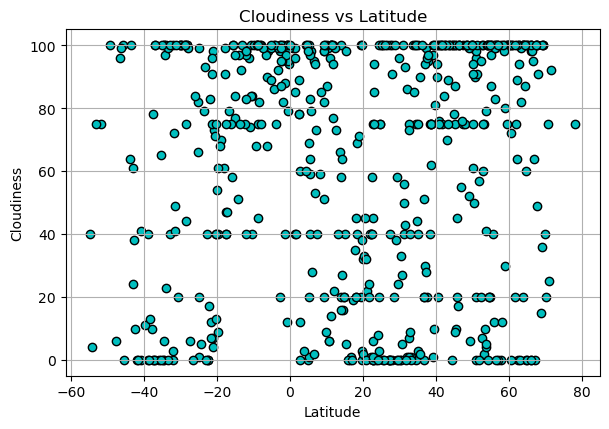

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(6,4))
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o",facecolors="c",edgecolors="black")
plt.tight_layout()
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

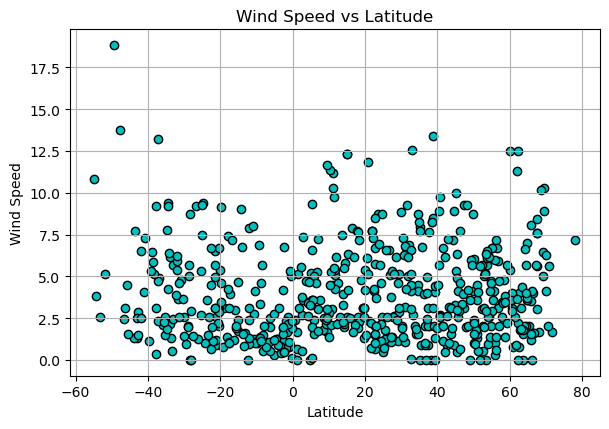

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(6,4))
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o",facecolors="c",edgecolors="black")
plt.tight_layout()
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def plot_linregress(x_val,y_val,x_label,y_label,annotate_x=0,annotate_y=0):
    x_value = x_val
    y_value = y_val
    (slope, intercept,rvalue,pvalue,stderr)=linregress(x_value,y_value)
    regress_value=x_value*slope+intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_value,y_value)
    plt.plot(x_value,regress_value,"r-")
    plt.annotate(line_eq,(annotate_x,annotate_y),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()



In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,remire-montjoly,4.9167,-52.2667,299.17,89,0,0.00,GF,1709466947
2,salekhard,66.5300,66.6019,264.41,94,95,3.99,RU,1709466948
3,bikenibeu village,1.3673,173.1241,300.13,89,40,5.14,KI,1709466949
5,miles city,46.4083,-105.8406,267.69,86,100,7.72,US,1709466950
6,belyy yar,53.6039,91.3903,262.09,79,79,0.00,RU,1709466950


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=pd.DataFrame(city_data_df.loc[city_data_df["Lat"]<0,:])


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,297.68,77,99,7.49,PN,1709466947
4,blackmans bay,-43.0167,147.3167,282.22,67,61,1.34,AU,1709466949
8,waitangi,-43.9535,-176.5597,286.94,92,64,1.34,NZ,1709466952
9,mumbwa,-14.9783,27.0619,302.43,38,84,1.74,ZM,1709466952
10,upington,-28.4478,21.2561,305.36,18,75,8.75,ZA,1709466953


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6947532374550835


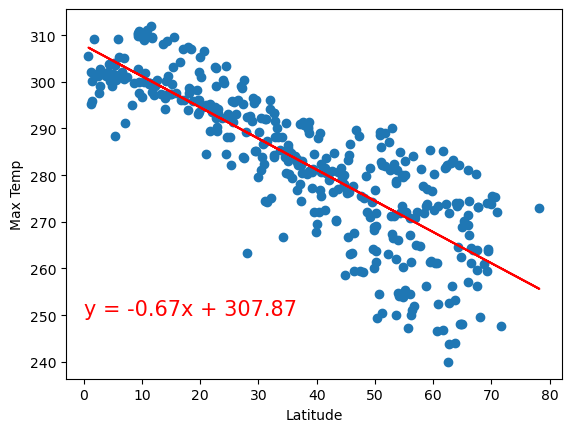

In [35]:
# Linear regression on Northern Hemisphere
plot_linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Latitude","Max Temp",0,250)

The r-squared is: 0.48622828244664484


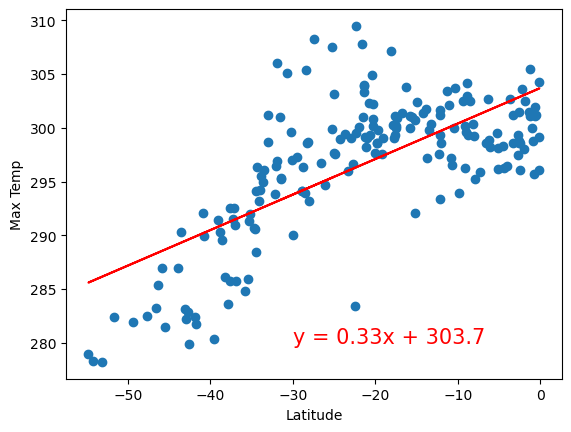

In [36]:
# Linear regression on Southern Hemisphere
plot_linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Latitude","Max Temp",-30,280)
                                  
                                  

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [37]:
'''
In northern hemisphere when it goes away from the rhe equater maximum tempeature declines while on the southern hemisphere when it goes close to equator temperature increases.
'''

'\nIn northern hemisphere when it goes away from the rhe equater maximum tempeature declines while on the southern hemisphere when it goes close to equator temperature increases.\n'

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.17455084986124766


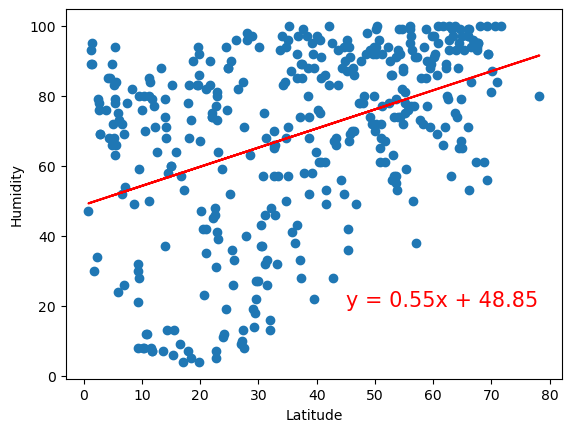

In [38]:
# Northern Hemisphere
plot_linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude","Humidity",45,20)

The r-squared is: 0.05372018146292573


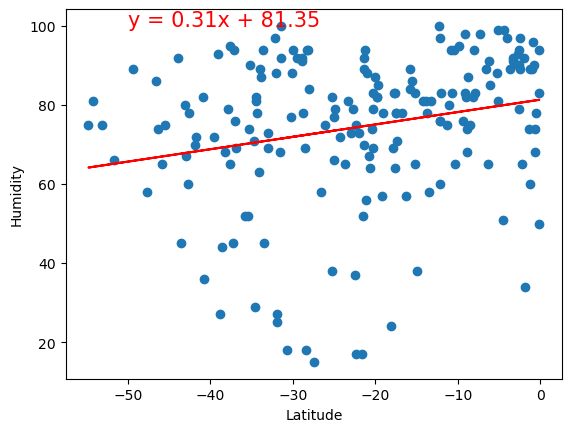

In [39]:
# Southern Hemisphere
plot_linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude","Humidity",-50,100)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [40]:
'''
In the southern hemisphere humidity is more when its close to the equator where as in Northern hemisphere humidity is 
overall high, if we look closer there is a slight increase in humidity close to equator.
'''

'\nIn the southern hemisphere humidity is more when its close to the equator where as in Northern hemisphere humidity is \noverall high, if we look closer there is a slight increase in humidity close to equator.\n'

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.03732075822166548


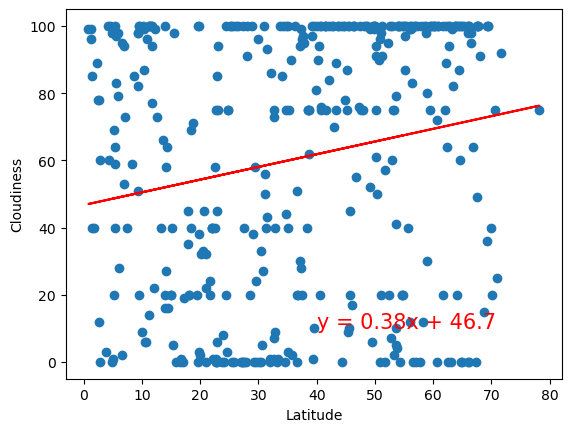

In [41]:
# Northern Hemisphere
plot_linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude","Cloudiness",40,10)


The r-squared is: 0.17143478003729545


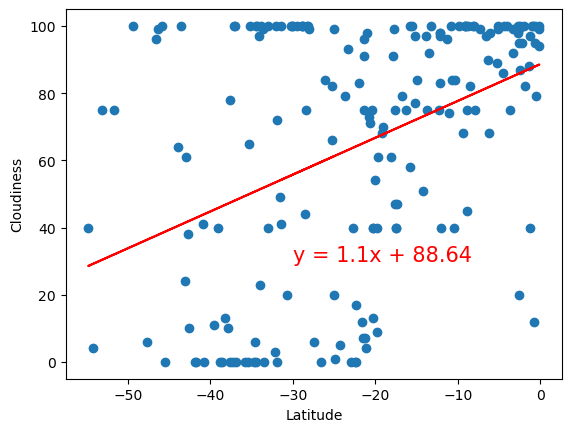

In [42]:
# Southern Hemisphere
plot_linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude","Cloudiness",-30,30)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [43]:
'''
There is not much relationship between latitude and cloudiness. if I stretch seems like more cloudiness close to equator.
'''

'\nThere is not much relationship between latitude and cloudiness. if I stretch seems like more cloudiness close to equator.\n'

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0003572700026192882


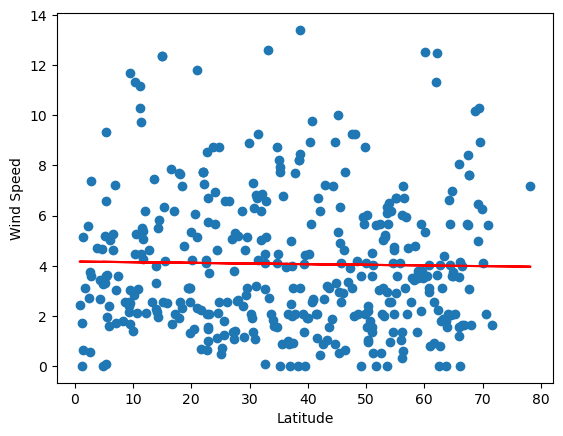

In [44]:
# Northern Hemisphere
plot_linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude","Wind Speed",5,15)


The r-squared is: 0.1399247304421132


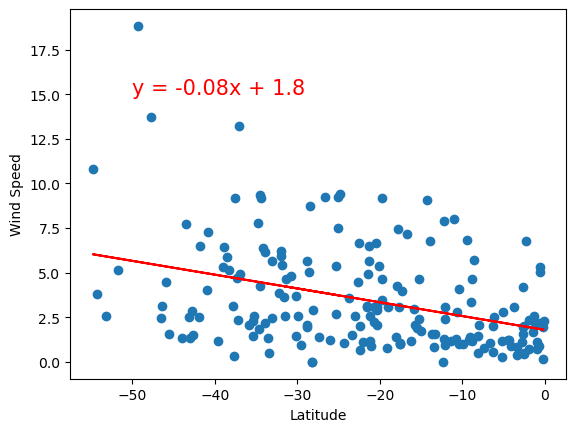

In [45]:
# Southern Hemisphere
plot_linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude","Wind Speed",-50,15)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [46]:
'''
Most of the cities in northern and southern hemisphere wind speed is low. There is no correlation between wind speed and latitude.
'''

'\nMost of the cities in northern and southern hemisphere wind speed is low. There is no correlation between wind speed and latitude.\n'